# Muhammad Nanda Arjuna Fadhillah
# 2109106028
# INFORMATIKA A1 2021
# POSTTEST KB 8 DEEP LEARNING
# [Tensorflow Dataset - Beans](https://www.tensorflow.org/datasets/catalog/beans)

# IMPORT LIBRARY

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense
import tensorflow_datasets as datatensor
import numpy as np

C:\Users\Last Man Standing\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# IMPORT DATASET DAN MEMBAGI TRAIN TEST 

In [5]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datatensor.load(
    "beans",
    split = ["train[:70%]", "train[:30%]"],
    batch_size = -1,
    as_supervised = True
    )

Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|                                                                 | 0/3 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:00,  8.21 examples/s]
Generating train examples...: 181 examples [00:00, 972.51 examples/s]
Generating train examples...: 358 examples [00:00, 1314.97 examples/s]
Generating train examples...: 522 examples [00:00, 1435.24 examples/s]
Generating train examples...: 691 examples [00:00, 1521.14 examples/s]
Generating train examples...: 866 examples [00:00, 1593.80 examples/s]
Generating train examples...: 1030 examples [00:00, 1604.91 examples/s]
                                                                       
Shuffling C:\Users\Last Man Standing\tensorflow_datasets\beans\0.1.0.incompleteWUXB3S\beans-train.tfrecord*...:   0%| |
Shuffling C:\Users\Last Man Standing\tensorflow_datasets\beans\0.1.0.incompleteWUXB3S\beans-

Dataset beans downloaded and prepared to C:\Users\Last Man Standing\tensorflow_datasets\beans\0.1.0. Subsequent calls will reuse this data.


# ONE HOT ENCODING

In [6]:
num_class = 10

# ONE HOT ENCODING
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test =tf.keras.utils.to_categorical(y_test_raw, num_class)

# Klasifikasi Dataset dengan MNIST

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [10]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

# Preview Gambar

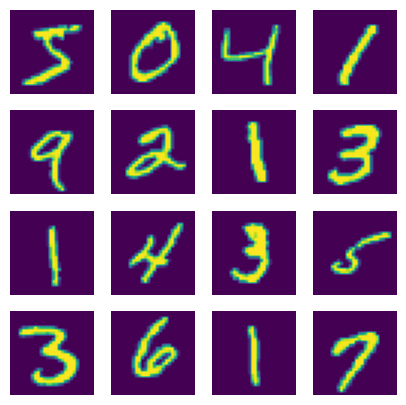

In [65]:
plt.figure(figsize = (5,5))
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

In [12]:
x_train_raw.shape

(60000, 28, 28)

In [29]:
x_test_raw.shape

(10000, 28, 28)

In [30]:
y_train_raw.shape

(60000,)

In [31]:
y_test_raw.shape

(10000,)

In [68]:
datatraining = tf.image.resize(x_train_raw, (28,28))
datatesting = tf.image.resize(x_test_raw, (28,28))

In [77]:
datatraining = np.reshape(datatraining, (2, 10976))
datatesting = np.reshape(datatesting, (4, 5488))

# MEMBUAT DNN

In [54]:
model = Sequential(
    [
        Dense(512, activation='relu', input_dim = 784),
        Dense(256, activation='relu'),
        Dense(36, activation='softmax')
    ]
)

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 36)                9252      
                                                                 
Total params: 542,500
Trainable params: 542,500
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
history = modeldata.fit(
    datatraining, 
    y_train, 
    batch_size = 64, 
    epochs = 30, 
    validation_data = (datatesting, y_test)
)

FileNotFoundError: [Errno 2] No such file or directory: './bottleneck_features/bn_features_train.npy'

In [ ]:
score = model.evaluate(x_test, y_test)
print("TEST LOSS    : ", score[0])
print("TEST ACCURACY: ", score[1])

In [ ]:
model.save('modelMnist')